In [168]:
import pandas as pd
import numpy as np
import os
import sys
import gc
from sklearn.manifold import TSNE
from importlib import reload
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import scipy 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import utils
reload(utils)

matplotlib.rcParams['figure.dpi'] = 200
plt.style.use('seaborn-deep')

In [169]:
"""
Load all Washtenaw Country Images and features
"""

DATA_PATH = "../cleaned_data/clean_data_w_landuse.csv"
data_df = pd.read_csv(DATA_PATH)
data_df['TRACT'] = data_df['TRACT'].astype(str)
print(data_df.shape)

(5013, 5375)


In [170]:
COLUMNS = utils.load_col_names()
COLUMNS.keys()

dict_keys(['POPULATION', 'INCOME', 'OCCUPTATION', 'EDUCATION', 'RED_EIGENVALUES', 'GREEN_EIGENVALUES', 'BLUE_EIGENVALUES', 'LANDUSE', 'GOOGLE_REDS', 'GOOGLE_GREENS', 'GOOGLE_BLUES', 'GOOGLE_COLOR_SCORES', 'GOOGLE_COLOR_FRACTIONS', 'GOOGLE_LABELS', 'GOOGLE_LABEL_SCORES', 'GOOGLE_MANUAL_LABELS'])

In [171]:
# COLUMNS['LANDUSE']

In [172]:
"""
biserial correlations
"""

land_cats = ['Interpolated: Developed, Open Space (sqm): Prop. of measured Census tract area',
             'Interpolated: Developed, Low Intensity (sqm): Prop. of measured Census tract are',
             'Interpolated: Developed, Medium Intensity (sqm): Prop. of measured Census tract',
             'Interpolated: Developed, High Intensity (urban imperviousness > 79%) (sqm)',
             'Interpolated: Barren Land (sqm): Prop. of measured Census tract area',
             'Interpolated: Deciduous Forest (sqm): Prop. of measured Census tract area',
             'Interpolated: Mixed Forest (sqm): Prop. of measured Census tract area',
             'Interpolated: Hay/Pasture (sqm): Prop. of measured Census tract area',
             'Interpolated: Cultivated Crops (sqm): Prop. of measured Census tract area']

kw_test_mat = np.zeros((len(COLUMNS['GOOGLE_MANUAL_LABELS']), len(land_cats)))

# for i in COLUMNS['GOOGLE_MANUAL_LABELS']:
#     positive = data_df[data_df[i] == 1]
#     negative = data_df[data_df[i] == 0]
#     for j in land_cats:
#         stat, p = scipy.stats.kruskal(positive[j], negative[j])
#         print(float(p))
        # kw_test_mat[i, j] = 

        # print(i, j, r, p)
    # break
        # corrs[j, i]

42.41483361003069 -84.10218118478795
Beige 0.637
Brown 0.873
Formation 0.618
Geology 0.719
Metal 0.511
Rock 0.849
Soil 0.839
Terrain 0.512
Tree 0.687

42.265312433990886 -83.75553323613072
2740
Aerial_photography 0.697
Architecture 0.726
Land_lot 0.711
Landscape 0.593
Photography 0.624
Plant 0.585
Residential_area 0.534
Text 0.852
Tree 0.687
Urban_design 0.804


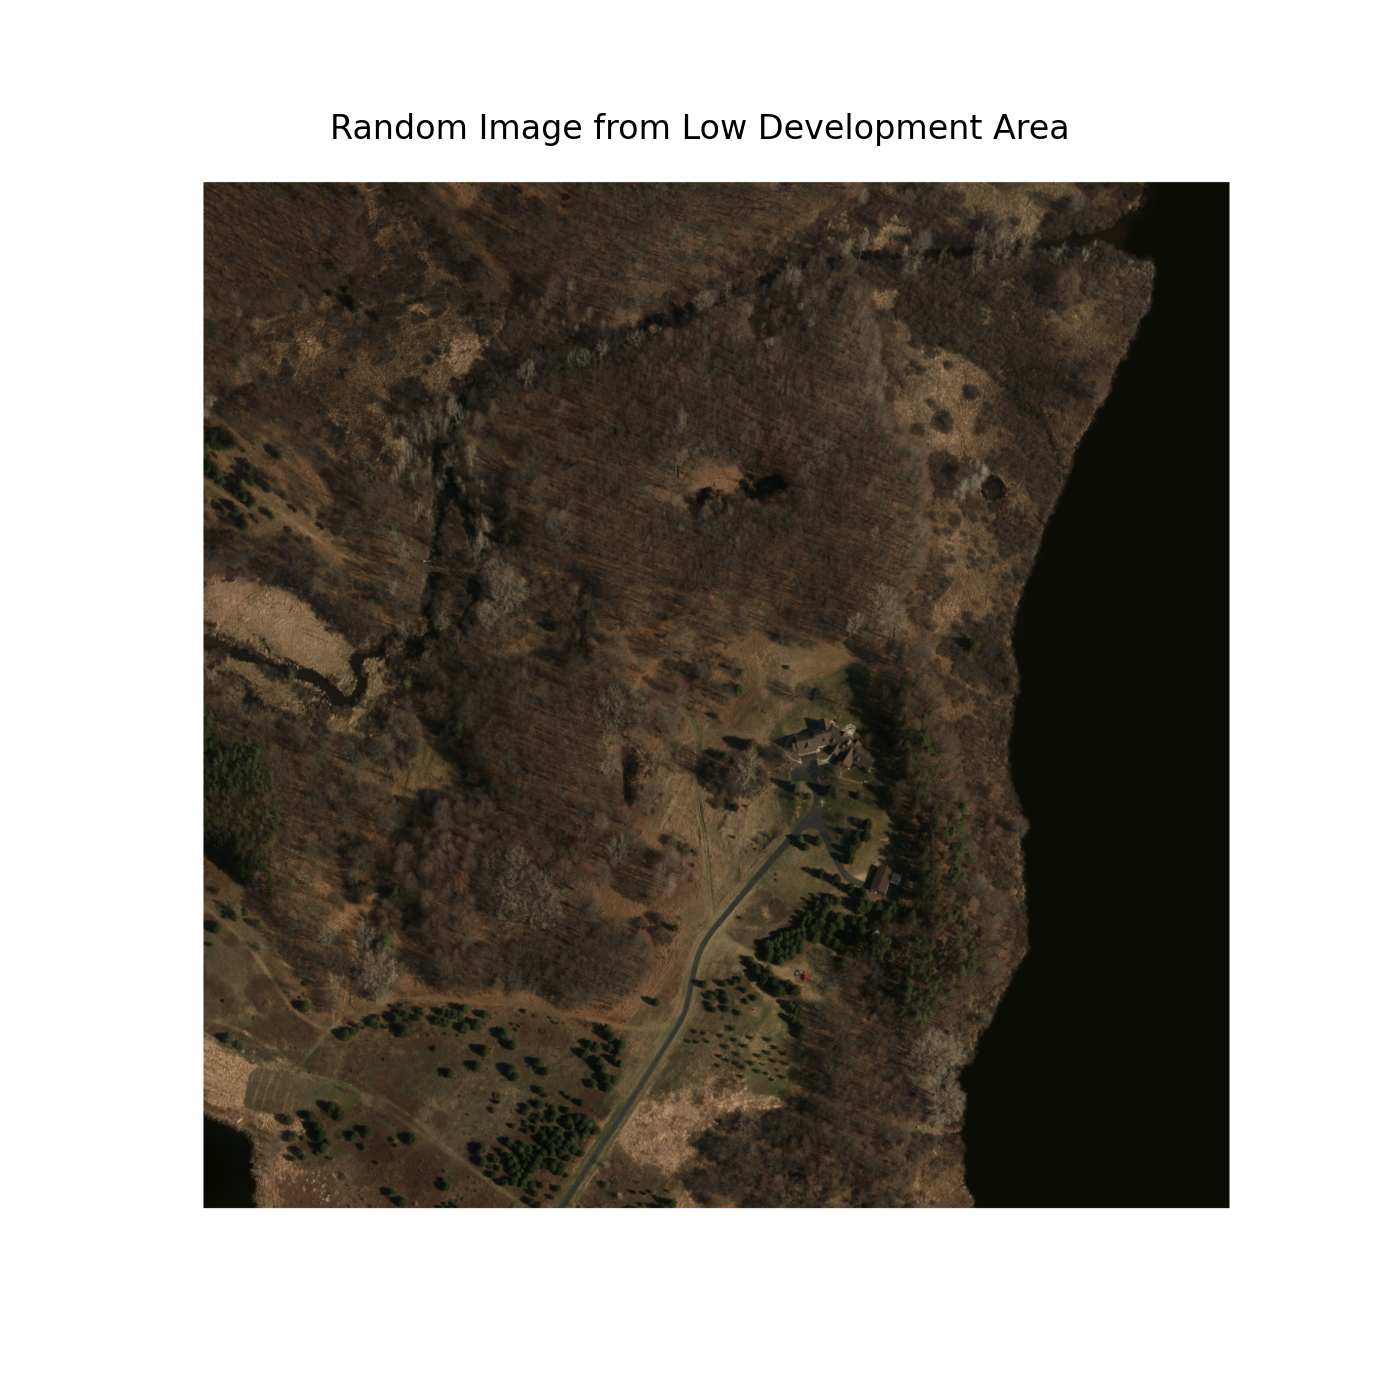

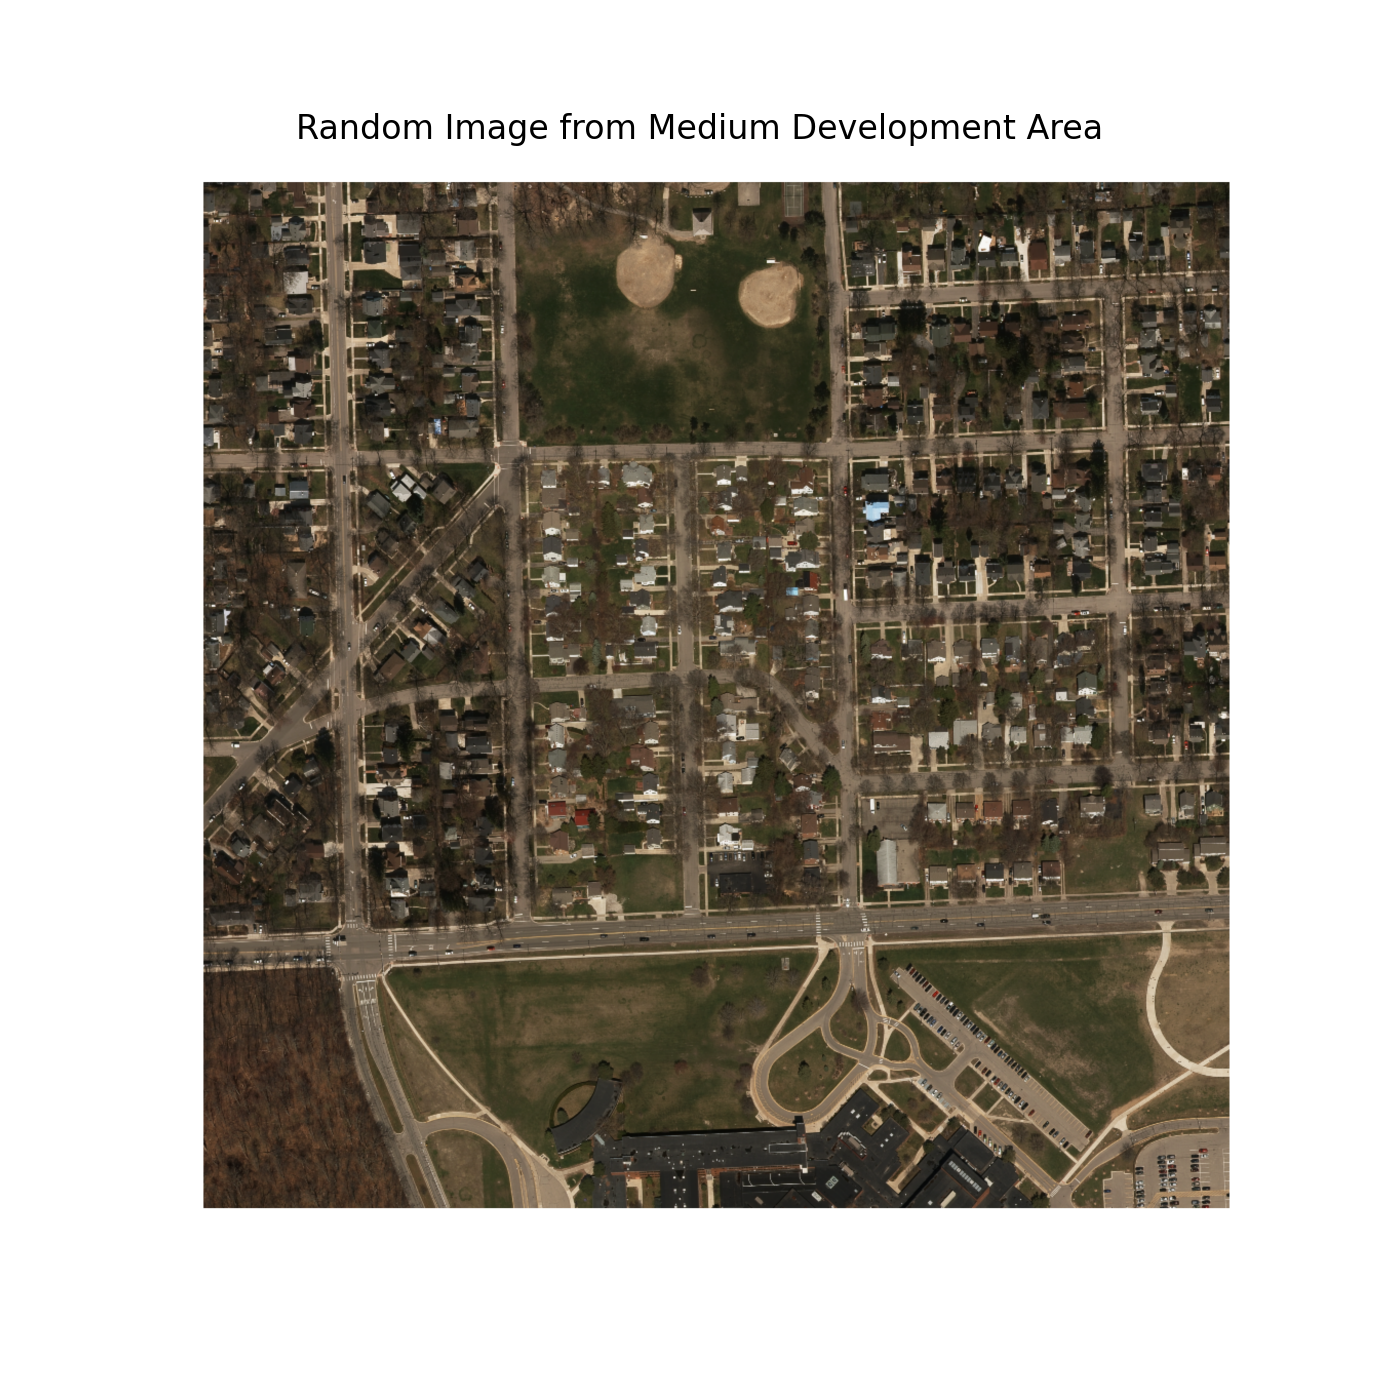

In [177]:
COLNAME = 'Interpolated: Developed, High Intensity (sqm): Prop. of measured Census tract ar'
TITLE = f"Distrubution of High Intensity Development in Washtenaw County (by image)"
IMG_DIR = "/Volumes/Cooper_TB_Drive/research/readmissions/image_files/Washtenaw"
min_sample = data_df[data_df[COLNAME] ==  data_df[COLNAME].min()].sample(1)
max_sample = data_df[(data_df[COLNAME] >= 0.1) & (data_df[COLNAME] <= 0.4)].sample(1)

# # histogram of intensity of devlopment
# data_df[COLNAME].hist(bins=30,
#                       log=True,
#                       edgecolor='black', 
#                       color='tab:blue', 
#                       alpha=0.7,
#                       density=True)
# plt.suptitle(TITLE)
# plt.xlabel("Proportion")
# plt.ylabel("Density (log)")
# save_filepath = f"../figures/{TITLE}.png"
# plt.savefig(save_filepath,  bbox_inches = 'tight')


"""
Sample low development
"""

print(min_sample['latitiude'].values[0], min_sample['longitude'].values[0])
im_id = str(min_sample['image_index'].values[0])
if len(im_id) > 3:    
    fname = f'{IMG_DIR}/chunk_{int(im_id[0])+1}_img_{im_id[1:]}.png'
else:
    fname = f'{IMG_DIR}/chunk_1_img_{im_id[0:]}.png'

# print postive labels
for col in COLUMNS['GOOGLE_LABELS']:
    if min_sample[col].values == 1:
        score_col = col.replace("_label", "_score")
        print(col.replace("_label", ""), min_sample[score_col].round(3).values[0])

min_title ='Random Image from Low Development Area'
fig = utils.build_fig(size=(9, 9), axis_off=True)
plt.imshow(plt.imread(fname)[:,:,:])
plt.title(min_title, y=.9)
save_filepath = f"../figures/{min_title}.png"
plt.savefig(save_filepath,  bbox_inches = 'tight')
print()

"""
Sample high development
"""


print(max_sample['latitiude'].values[0], max_sample['longitude'].values[0])
print(max_sample['image_index'].values[0])
im_id = str(max_sample['image_index'].values[0])
if len(im_id) > 3:    
    fname = f'{IMG_DIR}/chunk_{int(im_id[0])+1}_img_{im_id[1:]}.png'
else:
    fname = f'{IMG_DIR}/chunk_1_img_{im_id[0:]}.png'

# print postive labels
for col in COLUMNS['GOOGLE_LABELS']:
    if max_sample[col].values == 1:
        score_col = col.replace("_label", "_score")
        print(col.replace("_label", ""), max_sample[score_col].round(3).values[0])

max_title ='Random Image from Medium Development Area'
fig = utils.build_fig(size=(9, 9), axis_off=True)
plt.imshow(plt.imread(fname)[:,:,:])
plt.title(max_title, y=.9)
save_filepath = f"../figures/{max_title}.png"
plt.savefig(save_filepath,  bbox_inches = 'tight')

100